In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [5]:
# Path to image folder
image_folder = r'C:\Users\CHIRANJI\Desktop\cricdatasetsimages'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Create ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load and preprocess images from directory
train_generator = datagen.flow_from_directory(
    image_folder,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    image_folder,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Ensure the correct number of classes
num_classes = 4  # Number of classes (drive, leg glance-flick, pull shot, sweep)

# Check the label encoding
print(train_generator.class_indices)




Found 6187 images belonging to 8 classes.
Found 1546 images belonging to 8 classes.
{'coverdrive': 0, 'cut': 1, 'drive': 2, 'legglance': 3, 'pullshot': 4, 'scoop': 5, 'straightdrive': 6, 'sweep': 7}


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(8, activation='softmax')  # Adjust the number of output neurons to 8
])



# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)




Epoch 1/10


C:\Users\CHIRANJI\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


193/193 ━━━━━━━━━━━━━━━━━━━━ 83s 419ms/step - accuracy: 0.2540 - loss: 1.7800 - val_accuracy: 0.3926 - val_loss: 1.4695
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.3438 - loss: 0.7152 - val_accuracy: 0.5000 - val_loss: 0.7833
Epoch 3/10


D:\UOB\Anaconda\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


193/193 ━━━━━━━━━━━━━━━━━━━━ 84s 431ms/step - accuracy: 0.5027 - loss: 1.2313 - val_accuracy: 0.5124 - val_loss: 1.2432
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 0.6562 - loss: 0.4523 - val_accuracy: 0.6000 - val_loss: 0.6264
Epoch 5/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 83s 423ms/step - accuracy: 0.6578 - loss: 0.9055 - val_accuracy: 0.5964 - val_loss: 1.1755
Epoch 6/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.7500 - loss: 0.2856 - val_accuracy: 0.5000 - val_loss: 0.6699
Epoch 7/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 156s 803ms/step - accuracy: 0.7416 - loss: 0.6918 - val_accuracy: 0.6270 - val_loss: 1.0198
Epoch 8/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.8438 - loss: 0.2366 - val_accuracy: 0.7000 - val_loss: 0.4563
Epoch 9/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 83s 420ms/step - accuracy: 0.7942 - loss: 0.5411 - val_accuracy: 0.6380 - val_loss: 1.4000
Epoch 10/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.8125 - loss: 0.2009 - val_a

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 99s 502ms/step - accuracy: 0.8333 - loss: 0.4534 - val_accuracy: 0.6504 - val_loss: 1.3192
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.7188 - loss: 0.3907 - val_accuracy: 0.9000 - val_loss: 0.2227
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 106s 541ms/step - accuracy: 0.8661 - loss: 0.3661 - val_accuracy: 0.5938 - val_loss: 1.5656
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.6875 - loss: 0.4560 - val_accuracy: 0.4000 - val_loss: 1.0619
Epoch 5/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 103s 524ms/step - accuracy: 0.8751 - loss: 0.3511 - val_accuracy: 0.6784 - val_loss: 1.1759
Epoch 6/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.8125 - loss: 0.1862 - val_accuracy: 0.7000 - val_loss: 0.4960
Epoch 7/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 100s 506ms/step - accuracy: 0.9181 - loss: 0.2345 - val_accuracy: 0.6960 - val_loss: 1.2181
Epoch 8/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.9375 - loss: 0.

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))

49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 274ms/step - accuracy: 0.6971 - loss: 1.3819
Validation Accuracy: 68.37%


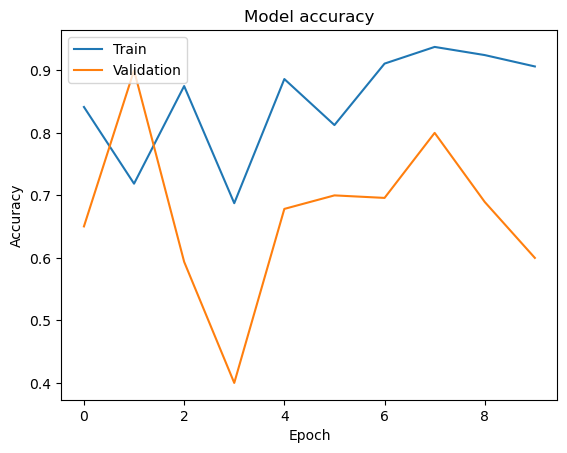

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



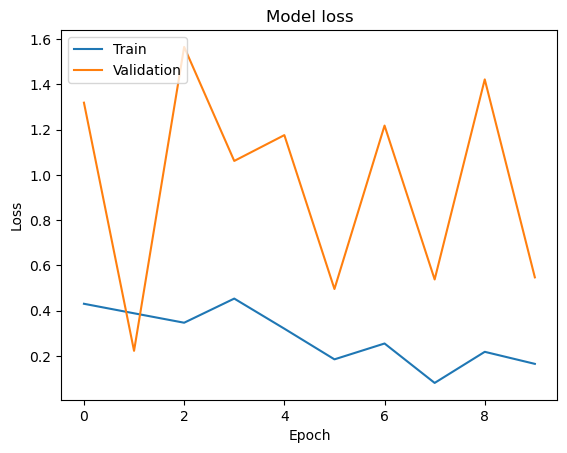

In [11]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict classes
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)



49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 470ms/step
Confusion Matrix:
[[  9   7  15  28  11   5   9  16]
 [  3   9  22  25  14   5   7  15]
 [ 15  14  48  67  32  16  11  43]
 [ 24   8  57 101  39  15  19  61]
 [ 36  21  77  94  37  13  23  51]
 [  5   5  13  35   9   9   6  18]
 [  9   6  27  28  15   3   1  11]
 [ 15  12  48  60  31  10   9  39]]


In [13]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.09      0.08       100
           1       0.11      0.09      0.10       100
           2       0.16      0.20      0.17       246
           3       0.23      0.31      0.27       324
           4       0.20      0.11      0.14       352
           5       0.12      0.09      0.10       100
           6       0.01      0.01      0.01       100
           7       0.15      0.17      0.16       224

    accuracy                           0.16      1546
   macro avg       0.13      0.13      0.13      1546
weighted avg       0.16      0.16      0.16      1546



In [14]:
# Save the model
model.save("cricket_shot_classifier.h5")


In [15]:
# Load the model
loaded_model = tf.keras.models.load_model("cricket_shot_classifier.h5")


In [28]:
import tensorflow as tf
import numpy as np

# Load a single image for prediction
img_path = r"C:\Users\CHIRANJI\Desktop\c_shotimages\pullshot\pullshot1.png"  # Update with the correct image path
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Predict class
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions)


# Print the predicted class
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: 4


In [29]:
# Define class labels
class_labels = ["coverdrive", "cut", "drive", "legglance", "pullshot", "scoop", "straightdrive", "sweep"]

# Load a single image for prediction
img_path = r"C:\Users\CHIRANJI\Desktop\c_shotimages\drive\drives5.png"  # Update with the correct image path
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Predict class
predictions = loaded_model.predict(img_array)
predicted_class_idx = np.argmax(predictions)

# Get the predicted class name
predicted_class_label = class_labels[predicted_class_idx]

# Print the predicted class index and name
print("Predicted class index:", predicted_class_idx)
print("Predicted class name:", predicted_class_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted class index: 2
Predicted class name: drive


In [30]:
# Define class labels
class_labels = ["coverdrive", "cut", "drive", "legglance", "pullshot", "scoop", "straightdrive", "sweep"]

# Load a single image for prediction
img_path = r"C:\Users\CHIRANJI\Desktop\c_shotimages\pullshot\pullshot1.png"   # Update with the correct image path
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Predict class
predictions = loaded_model.predict(img_array)
predicted_class_idx = np.argmax(predictions)

# Get the predicted class name
predicted_class_label = class_labels[predicted_class_idx]

# Print the predicted class index and name
print("Predicted class index:", predicted_class_idx)
print("Predicted class name:", predicted_class_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class index: 4
Predicted class name: pullshot


In [31]:
# Define class labels
class_labels = ["coverdrive", "cut", "drive", "legglance", "pullshot", "scoop", "straightdrive", "sweep"]

# Load a single image for prediction
img_path = r"C:\Users\CHIRANJI\Desktop\c_shotimages\sweep\sweep5.png"   # Update with the correct image path
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Predict class
predictions = loaded_model.predict(img_array)
predicted_class_idx = np.argmax(predictions)

# Get the predicted class name
predicted_class_label = class_labels[predicted_class_idx]

# Print the predicted class index and name
print("Predicted class index:", predicted_class_idx)
print("Predicted class name:", predicted_class_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted class index: 7
Predicted class name: sweep


In [32]:
# Define class labels
class_labels = ["coverdrive", "cut", "drive", "legglance", "pullshot", "scoop", "straightdrive", "sweep"]

# Load a single image for prediction
img_path = r"C:\Users\CHIRANJI\Desktop\c_shotimages\coverdrive\coverdrive6.png"   # Update with the correct image path
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Predict class
predictions = loaded_model.predict(img_array)
predicted_class_idx = np.argmax(predictions)

# Get the predicted class name
predicted_class_label = class_labels[predicted_class_idx]

# Print the predicted class index and name
print("Predicted class index:", predicted_class_idx)
print("Predicted class name:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted class index: 1
Predicted class name: cut


In [33]:
# Define class labels
class_labels = ["coverdrive", "cut", "drive", "legglance", "pullshot", "scoop", "straightdrive", "sweep"]

# Load a single image for prediction
img_path = r"C:\Users\CHIRANJI\Desktop\c_shotimages\cut\cut2.png"   # Update with the correct image path
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

# Predict class
predictions = loaded_model.predict(img_array)
predicted_class_idx = np.argmax(predictions)

# Get the predicted class name
predicted_class_label = class_labels[predicted_class_idx]

# Print the predicted class index and name
print("Predicted class index:", predicted_class_idx)
print("Predicted class name:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted class index: 1
Predicted class name: cut
